In [1]:
import transporters.ptc_twiss.configuration as twiss_configuration_gen
import visualization.visualize as plotter
import data.grid_configuration as grid_configuration_module
import os
import matplotlib.pyplot as plt
import seaborn as sns
from data.parameters_names import ParametersNames as Parameters
import transporters.transporters_factory as transporters_factory

In [2]:
plt.style.use(["ggplot"])

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"

optic_folder_name = "2016"

xml_file_name = "configuration_reconst_beam1.xml"

In [4]:
s = 219.55
item_number = 2
path_to_xml_file = os.path.join(path_to_project, optic_folder_name, xml_file_name)
twiss_configuration = twiss_configuration_gen.TwissConfiguration.get_configuration_from_file(path_to_xml_file, item_number, s)
transporter = transporters_factory.get_transporter(twiss_configuration)

In [7]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.01
sigma_pt = 0.01

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 11

grid_configuration = grid_configuration_module.CanonicalCoordinatesGridConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [8]:
particles = grid_configuration.generate_grid()

In [9]:
title_sufix = "2017 nominal, twiss"

In [10]:
segments = transporter(particles)

In [11]:
matrix = segments["end"]

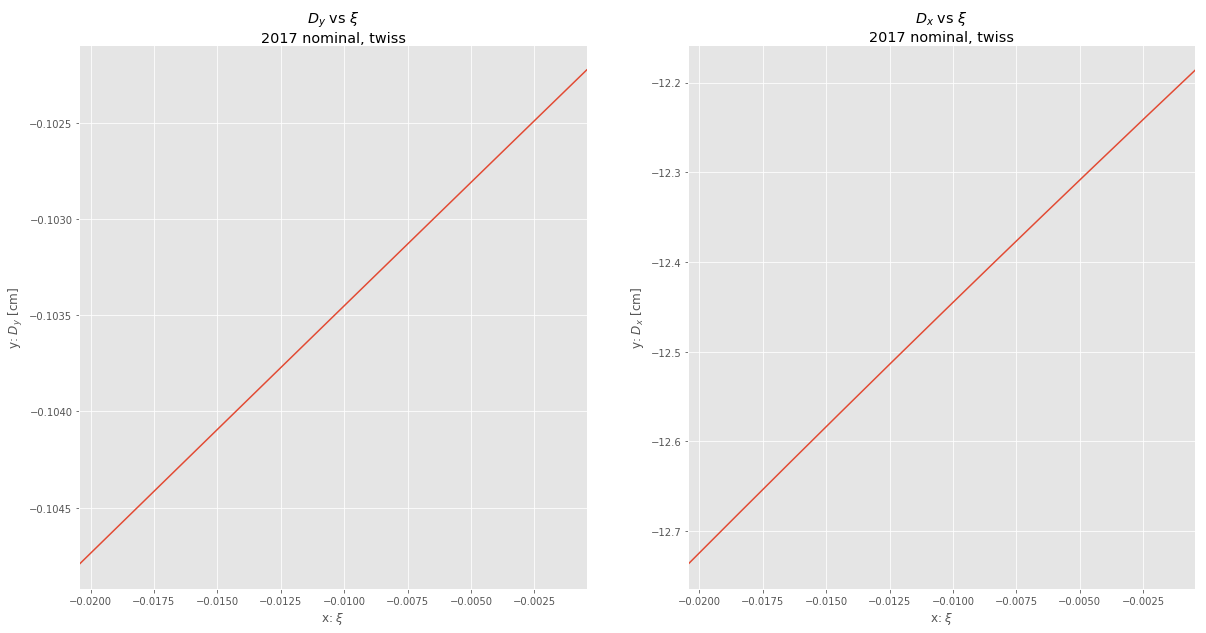

In [12]:
f, axes = plt.subplots(1, 2)

fig = plt.gcf()
fig.set_size_inches(20,10)

plotter.plot_from_one_matrix(Parameters.PT, Parameters.D_Y, matrix, title_sufix=title_sufix, ax=axes[0])
axes = plotter.plot_from_one_matrix(Parameters.PT, Parameters.D_X, matrix, title_sufix=title_sufix, ax=axes[1])

In [14]:
a = matrix.to_pandas_data_frame()

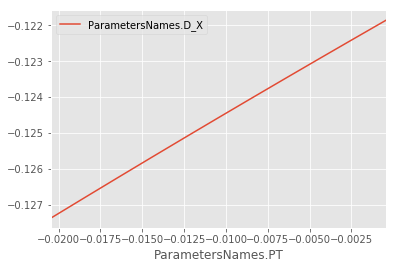

In [15]:
a.plot(x = Parameters.PT, y = Parameters.D_X)